# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


In [2]:
# import libraries
import numpy as np
import torch
from DDPG_agent import Agent
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Train DDPG Agent in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size=state_size, action_size=action_size, warmup=1000, random_seed=0)

# Set the number of maximum timesteps per epoch
timesteps = 1000

# Set the number of episodes to run the simulation
episodes = 10000

scores_window = deque(maxlen=100)           # last 100 scores
scores_total = []                           # scores per epoch for each agent

cnt=0
for episode in range(1, episodes+1): 
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(1)                    # initialize the score (for each agent), for this task we have 1 agent
    
    agent.reset()
    
    for t in range(timesteps):
        # Predict the best action for the current state. 
        actions = agent.act(states, cnt, add_noise = True)
        cnt+=1
        
        # Action is performed and new state, reward, info are received. 
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        
        # current state, action, reward, new state are stored in the experience replay
        agent.step(states, actions, rewards, next_states, dones)
        
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break 
    
    scores_window.append(np.mean(scores))       # save most recent score
    scores_total.append(np.mean(scores))        # save every score per epoch
    print('\rTotal score (averaged over agents) for episode {}: {}'.format(episode, np.mean(scores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
    if np.mean(scores_window)>=30.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_episode_{}.pth'.format(episode-100))
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_episode_{}.pth'.format(episode-100))
        break

Episode 100	Average Score: 1.35ts) for episode 100: 3.7899999152868986
Episode 200	Average Score: 10.82s) for episode 200: 27.989999374374747
Episode 300	Average Score: 27.00s) for episode 300: 27.519999384880066
Total score (averaged over agents) for episode 371: 29.269999345764518
Environment solved in 271 episodes!	Average Score: 30.08


When finished, you can close the environment.

In [ ]:
env.close()

### 4. Plot Scores for each epoch

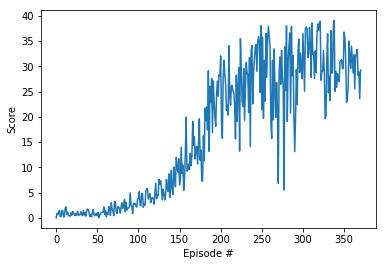

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_total)), scores_total)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
plt.savefig("plot_of_rewards.png")